In [367]:
from prophet import Prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [368]:
df = pd.read_csv(r'C:\Users\bendh\OneDrive\Desktop\SalesPrediction\pred.csv', sep = ';')
df.head(170)

,client,date,CA,Cout Achat Total,Quantity,Technology,Group Material,DeliveryOffer
0,LASERSEVE,2023-01-28 09:56:26.771000000,248.6328,165.755200,3,tolerie,Acier,Fast
1,LASERSEVE,2023-03-26 10:51:01.361000000,548.41217,365.608120,20,tolerie,Aluminium,Fast
2,LASERSEVE,2023-03-24 07:28:44.458000000,454.90961,303.273070,10,tolerie,Aluminium,Fast
3,LASERSEVE,2023-02-26 11:47:11.776000000,257.89801,171.932010,3,usinage_cnc,Acier,Fast
4,SATI,2023-03-25 09:52:55.578000000,318.07419,212.049450,22,tolerie,Acier,Fast
...,...,...,...,...,...,...,...,...
165,CESBIO CNRS,22/03/2023,100.08,76.984619,12,tolerie,Aluminium,Standard
166,CESBIO CNRS,22/03/2023,564,433.846160,24,tolerie,Aluminium,Standard
167,CESBIO CNRS,22/03/2023,247.67999,190.523070,12,tolerie,Aluminium,Standard
168,CESBIO CNRS,22/03/2023,64.800003,49.846157,12,tolerie,Aluminium,Standard


In [385]:
df['date'].replace("/","-")
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
df['CA'] = pd.to_numeric(df['CA'], errors='coerce').astype(float)

In [370]:
df_sales= df.groupby('date').CA.sum().reset_index()

In [371]:
#df_sales.set_index('date',inplace=True) #Date is set as index since it is time series
df_sales.head(170)

,date,CA
0,2022-05-01,12261.560176
1,2022-06-01,132.800000
2,2022-07-01,265.000000
3,2022-08-01,219.000000
4,2022-08-30,360.698390
5,2022-09-01,3954.200030
6,2022-09-27,815.302800
7,2022-10-01,431.889991
8,2022-10-03,25.822800
9,2022-10-27,80.956802


In [372]:
#df.dropna(inplace=True)
#z_scores = np.abs((df['CA'] - df['CA'].mean()) / df['CA'].std())
#z_scores

In [373]:
# exclude outliers from the original DataFrame
#df = df[z_scores <= 2]
#df

In [374]:
df_sales.isna().sum() #Missing Values

date    0
CA      0
dtype: int64

In [375]:
df_sales.dropna(inplace=True) #drop Null values

In [376]:
df_sales=df_sales.rename(columns={'date':'ds',
                        'CA':'y'})
df_sales.head()

,ds,y
0,2022-05-01,12261.560176
1,2022-06-01,132.800000
2,2022-07-01,265.000000
3,2022-08-01,219.000000
4,2022-08-30,360.698390


In [377]:
my_model = Prophet(interval_width=0.95)

In [378]:
my_model.fit(df_sales)

10:33:46 - cmdstanpy - INFO - Chain [1] start processing
10:33:46 - cmdstanpy - INFO - Chain [1] done processing


In [386]:
future_dates = my_model.make_future_dataframe(periods=6, freq='MS')
future_dates.head()

,ds
0,2022-05-01
1,2022-06-01
2,2022-07-01
3,2022-08-01
4,2022-08-30


In [380]:
forecast = my_model.predict(future_dates)
forecast['actual']=df_sales['y']
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,actual
0,2022-05-01,2462.102865,-4051.483773,10115.672386,2462.102865,2462.102865,696.013953,696.013953,696.013953,696.013953,696.013953,696.013953,0.0,0.0,0.0,3158.116818,12261.560176
1,2022-06-01,2461.653334,-2650.161066,12132.994948,2461.653334,2461.653334,2265.308985,2265.308985,2265.308985,2265.308985,2265.308985,2265.308985,0.0,0.0,0.0,4726.962319,132.800000
2,2022-07-01,2461.218305,-7215.510613,7935.815184,2461.218305,2461.218305,-2232.238118,-2232.238118,-2232.238118,-2232.238118,-2232.238118,-2232.238118,0.0,0.0,0.0,228.980187,265.000000
3,2022-08-01,2460.768774,-3363.416764,10963.092379,2460.768774,2460.768774,1583.880318,1583.880318,1583.880318,1583.880318,1583.880318,1583.880318,0.0,0.0,0.0,4044.649092,219.000000
4,2022-08-30,2460.348245,-5666.570370,8299.068667,2460.348245,2460.348245,-1063.402212,-1063.402212,-1063.402212,-1063.402212,-1063.402212,-1063.402212,0.0,0.0,0.0,1396.946033,360.698390


In [381]:
se = np.square(forecast.loc[:, 'yhat'] - df_sales['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

3727.9215496954203


In [382]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [383]:
mae(forecast.loc[:, 'yhat'][ :40],df_sales['y'])

2315.2193249892116

<AxesSubplot:xlabel='ds'>

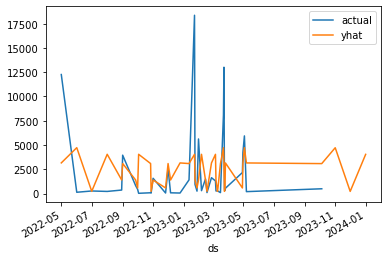

In [384]:
forecast.set_index('ds',inplace=True)
forecast[['actual','yhat']].plot()